<a href="https://colab.research.google.com/github/KUTURUSAISUJITH/LAPTOP-PRICE-PREDECTION-USING-MACHINE-LEARNING/blob/main/ml_capastone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# import the datset
df = pd.read_csv('/content/laptop (2).zip')

In [ ]:
# check the dataset
df.head()

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [ ]:
# info of the datset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      1303 non-null   int64  
 1   Unnamed: 0        1273 non-null   float64
 2   Company           1273 non-null   object 
 3   TypeName          1273 non-null   object 
 4   Inches            1273 non-null   object 
 5   ScreenResolution  1273 non-null   object 
 6   Cpu               1273 non-null   object 
 7   Ram               1273 non-null   object 
 8   Memory            1273 non-null   object 
 9   Gpu               1273 non-null   object 
 10  OpSys             1273 non-null   object 
 11  Weight            1273 non-null   object 
 12  Price             1273 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [ ]:
# check for the nullvalues
df.isnull().sum()

Unnamed: 0.1         0
Unnamed: 0          30
Company             30
TypeName            30
Inches              30
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              30
Gpu                 30
OpSys               30
Weight              30
Price               30
dtype: int64

In [ ]:
# drop the null values
df.dropna(inplace=True)

In [ ]:
# get the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      1273 non-null   int64  
 1   Unnamed: 0        1273 non-null   float64
 2   Company           1273 non-null   object 
 3   TypeName          1273 non-null   object 
 4   Inches            1273 non-null   object 
 5   ScreenResolution  1273 non-null   object 
 6   Cpu               1273 non-null   object 
 7   Ram               1273 non-null   object 
 8   Memory            1273 non-null   object 
 9   Gpu               1273 non-null   object 
 10  OpSys             1273 non-null   object 
 11  Weight            1273 non-null   object 
 12  Price             1273 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 139.2+ KB


In [ ]:
# drop unessary columns
df.drop(columns=['Unnamed: 0.1','Unnamed: 0'],inplace=True)

In [ ]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


**Feature engineering**

In [ ]:
# replacing the extra letters with empty space (gb in ram ,kg in weight)
df['Ram'] = df['Ram'].str.replace('GB','')
df['Weight'] = df['Weight'].str.replace('kg','')

In [ ]:
df['Weight'].value_counts()

Weight
2.2     111
2.1      57
2.4      43
2.3      41
2.5      37
       ... 
1.41      1
3.6       1
4.7       1
4.33      1
4.0       1
Name: count, Length: 189, dtype: int64

In [ ]:
# if there  are string types in this column then they will be converted to nan (not a number)
df['Weight'] = pd.to_numeric(df['Weight'], errors='coerce')

In [ ]:
# changing the dtypes for the respected columns
df['Ram']=df['Ram'].astype('int32')
df['Weight']=df['Weight'].astype('float32')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   object 
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   int32  
 6   Memory            1273 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1272 non-null   float32
 10  Price             1273 non-null   float64
dtypes: float32(1), float64(1), int32(1), object(8)
memory usage: 109.4+ KB


In [ ]:
# import the seaborn library
import seaborn as sns

<ipython-input-16-9cfe2f94950e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

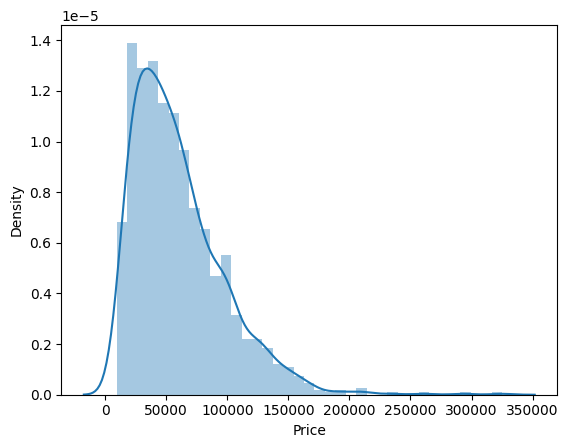

In [ ]:
# dist plot to show the price
sns.distplot(df['Price'])

<Axes: xlabel='Company'>

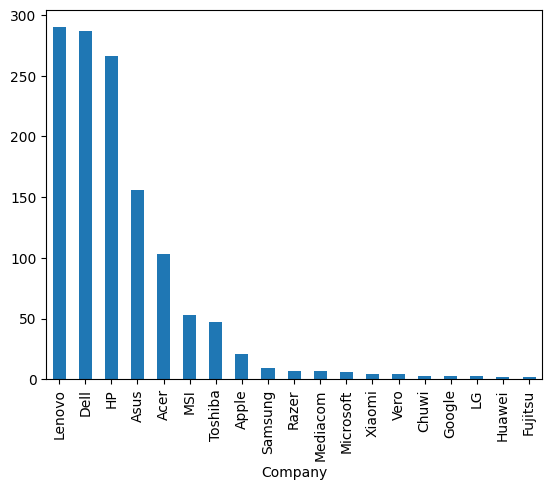

In [ ]:
# bar plot representing the name of the company of laptops and howmany of them are present here
df['Company'].value_counts().plot(kind='bar')

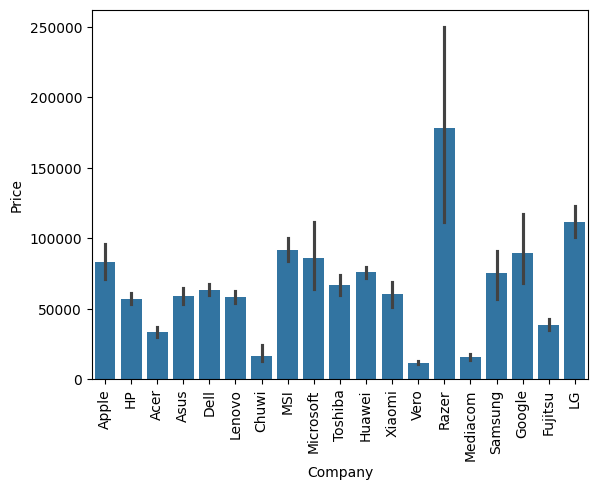

In [ ]:
# checking the impact of comapny on the price with the bar plot
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='TypeName'>

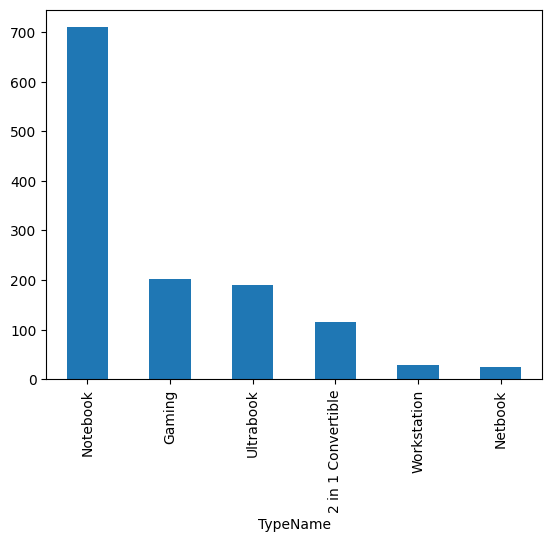

In [ ]:
# checking into howmany different types the laptop is classified in the given dataset with the help of bar plot
df['TypeName'].value_counts().plot(kind='bar')

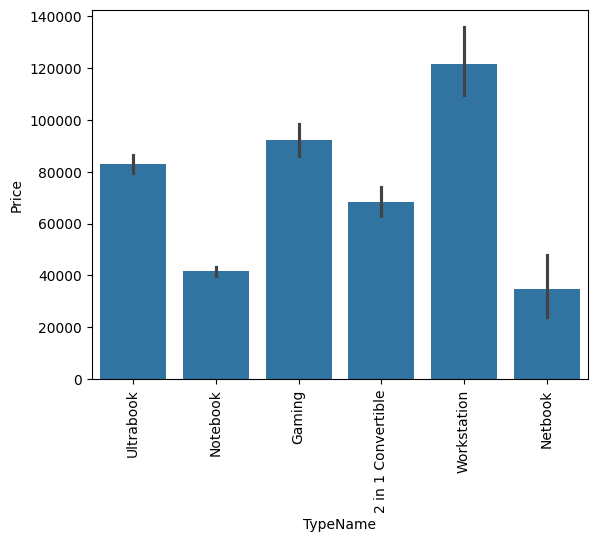

In [ ]:
#checking the relation beteween the typename and the price
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: ylabel='Inches'>

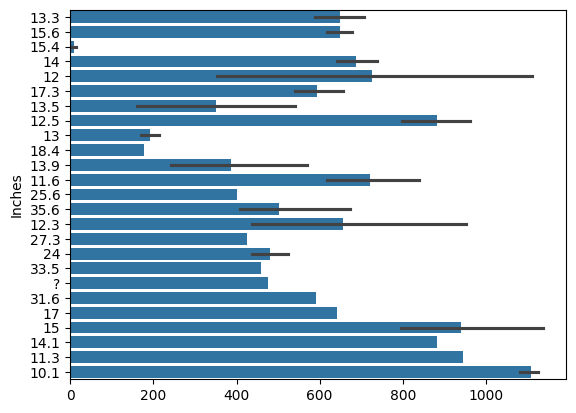

In [ ]:
sns.barplot(df['Inches'])

<Axes: xlabel='Inches', ylabel='Price'>

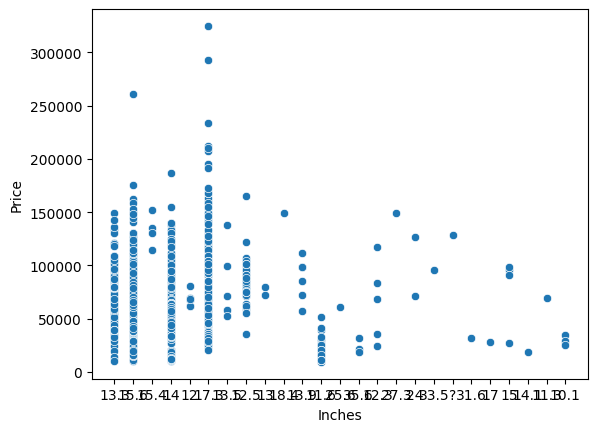

In [ ]:
sns.scatterplot(x=df['Inches'],y=df['Price'])

In [ ]:
# checking into howmany types screen resoultion is present
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                495
1366x768                                         274
IPS Panel Full HD 1920x1080                      226
IPS Panel Full HD / Touchscreen 1920x1080         52
Full HD / Touchscreen 1920x1080                   45
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  14
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160                9
4K Ultra HD 3840x2160                              7
IPS Panel 1366x768                                 7
IPS Panel Retina Display 2560x1600                 6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
Touchscreen 2560x1440                              6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

In [ ]:
# creating a new column touchscreen using the creen resolution column and lambda function
# if touchscreen in resolution then 1 else 0
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [ ]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0


<Axes: xlabel='Touchscreen'>

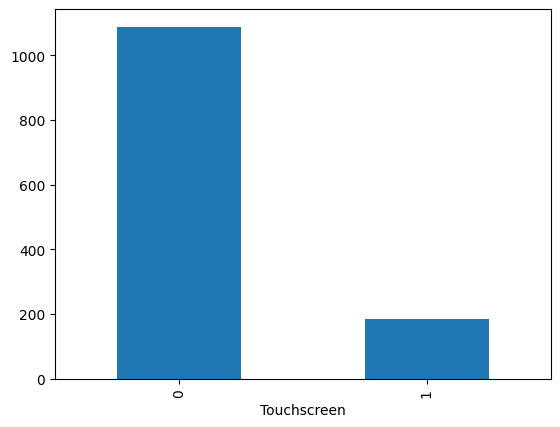

In [ ]:
# checking how many lapotps from the dataset are touchscreen and not with the help of the dataset
df['Touchscreen'].value_counts().plot(kind='bar')

<Axes: xlabel='Touchscreen', ylabel='Price'>

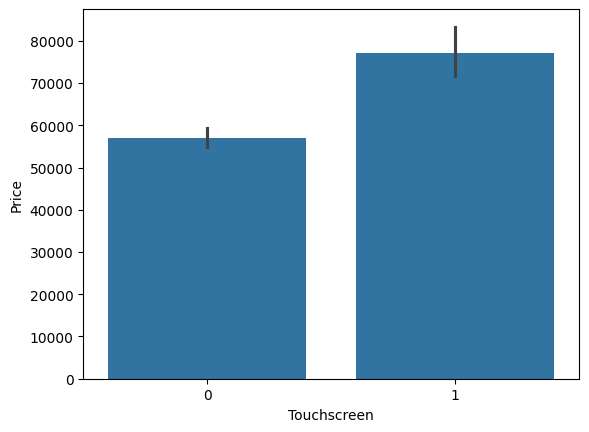

In [ ]:
# the impact of the barplot on the price column
sns.barplot(x=df['Touchscreen'],y=df['Price'])

In [ ]:
# create a new column ips ,if ips is there in the screen resolution then zero else one
df['Ips'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


<Axes: xlabel='Ips'>

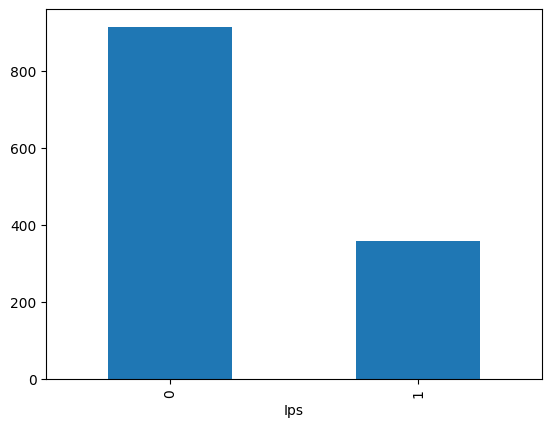

In [ ]:
#count of ips from the screen resolution column
df['Ips'].value_counts().plot(kind='bar')

<Axes: xlabel='Ips', ylabel='Price'>

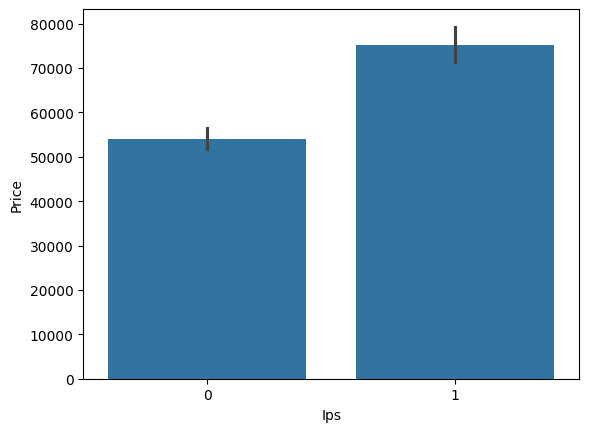

In [ ]:
# checking the impact of ips with price
sns.barplot(x=df['Ips'],y=df['Price'])

In [ ]:
# Split the ScreenResolution  column by x and expand it into separate columns
new = df['ScreenResolution'].str.split('x',n=1,expand=True)

In [ ]:
# Assign the first split part to the X_res column and the second split part to the Y_res column.
df['X_res'] = new[0]
df['Y_res'] = new[1]

In [ ]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
913,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Nvidia GeForce 930MX,Windows 10,2.04,54291.7872,0,0,Full HD 1920,1080
683,HP,Notebook,17.3,IPS Panel Full HD 1920x1080,Intel Core i3 6006U 2GHz,4,256GB SSD,AMD Radeon R5 520,Windows 10,2.50,37242.7200,0,1,IPS Panel Full HD 1920,1080
394,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,AMD Radeon R7 M445,Linux,2.33,41498.1936,0,0,Full HD 1920,1080
486,Dell,Workstation,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6820HQ 2.7GHz,16,512GB SSD,Nvidia Quadro M620,Windows 10,2.17,124568.6400,0,1,IPS Panel Full HD 1920,1080
194,Dell,2 in 1 Convertible,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 8550U 1.8GHz,8,1TB HDD,Intel UHD Graphics 620,Windows 10,1.62,44701.9200,1,1,IPS Panel Full HD / Touchscreen 1920,1080


In [ ]:
# Remove commas and extract the first numerical sequence from the X_res column
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [ ]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [ ]:
# Convert X_res and Y_res columns to integer data type
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')

In [ ]:
# removing the ScreenResolution,Inches columns from the dat set
df.drop(columns=['ScreenResolution','Inches'],inplace=True)

In [ ]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz     183
Intel Core i7 7700HQ 2.8GHz    142
Intel Core i7 7500U 2.7GHz     128
Intel Core i7 8550U 1.8GHz      72
Intel Core i5 8250U 1.6GHz      68
                              ... 
AMD A9-Series 9420 2.9GHz        1
Intel Core i7 2.2GHz             1
AMD A6-Series 7310 2GHz          1
Intel Atom Z8350 1.92GHz         1
AMD E-Series 9000e 1.5GHz        1
Name: count, Length: 118, dtype: int64

In [ ]:
# create a new column cpu name from the cpu column and extracting the first three words from the cpu column
df['Cpu Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [ ]:
# def a function fetch_processor
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [ ]:
# apply the fetch_processor function tp the Cpu brand column
df['Cpu brand'] = df['Cpu Name'].apply(fetch_processor)

In [ ]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res,Cpu Name,Cpu brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,Intel Core i5,Intel Core i5


<Axes: xlabel='Cpu brand'>

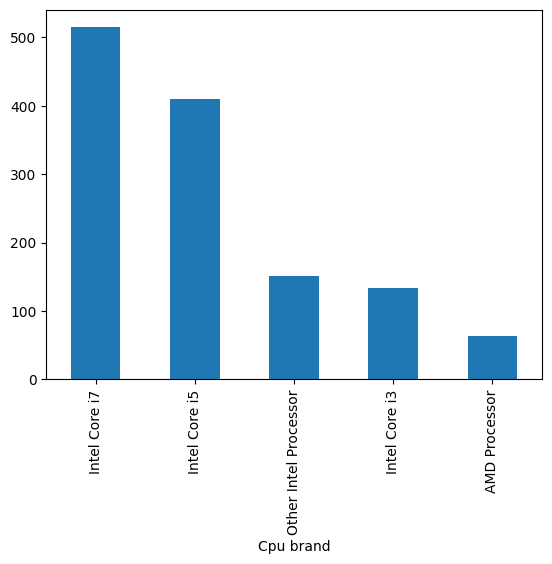

In [ ]:
# check the different types of the cpu brands using the barplot
df['Cpu brand'].value_counts().plot(kind='bar')

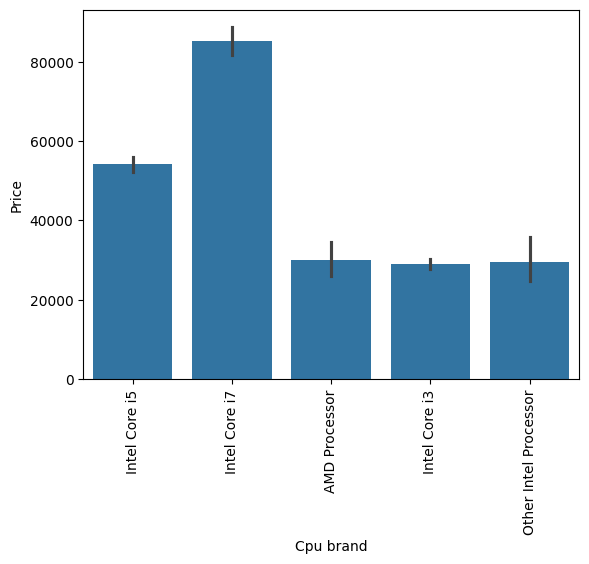

In [ ]:
# impact of price on the cpu brand using Price column
sns.barplot(x=df['Cpu brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# remove the 'Cpu','Cpu Name' columns
df.drop(columns=['Cpu','Cpu Name'],inplace=True)

In [ ]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res,Cpu brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,Intel Core i5


<Axes: xlabel='Ram'>

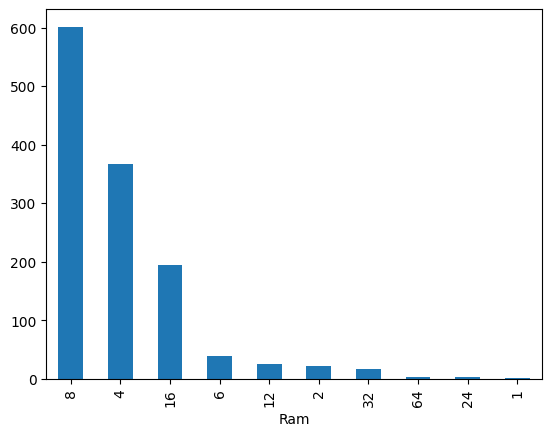

In [ ]:
# check how many types of values of ram are present
df['Ram'].value_counts().plot(kind='bar')

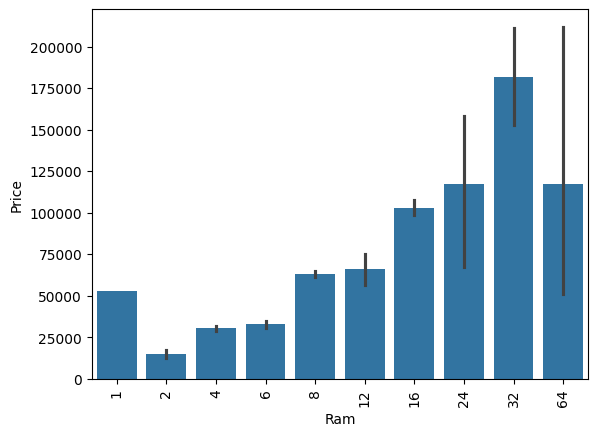

In [ ]:
# chheck the impact of the price with ram
sns.barplot(x=df['Ram'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
df['Memory'].value_counts()

Memory
256GB SSD                        401
1TB HDD                          217
500GB HDD                        130
512GB SSD                        116
128GB SSD +  1TB HDD              92
128GB SSD                         74
256GB SSD +  1TB HDD              71
32GB Flash Storage                37
2TB HDD                           16
64GB Flash Storage                14
512GB SSD +  1TB HDD              14
1TB SSD                           13
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          4
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
128GB SSD +  2TB HDD               2
256GB SSD +  500GB HDD             2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [ ]:
# con vert the memory column to string type and remove zero and save the result
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
# emove gb from the memory column
df["Memory"] = df["Memory"].str.replace('GB', '')
# Replace the tb with 000 in the memory column
df["Memory"] = df["Memory"].str.replace('TB', '000')
# split the memory column into two parts and expand them to separate columns
new = df["Memory"].str.split("+", n = 1, expand = True)
# create a new column first and trim the extra spaces
df["first"]= new[0]
df["first"]=df["first"].str.strip()
#

df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)
# remove non digit character from the first column
df['first'] = df['first'].str.replace(r'\D', '')
# fill the missing values with zero in the second column
df["second"].fillna("0", inplace = True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)
# remove numerical from the column
df['second'] = df['second'].str.replace(r'\D', '')
# calculate the total hdd storage
df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
# calculate the total ssd storage
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
# calculate the total hybrid storage
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
# calculate the total flash_storage
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])
# drop unseccary columns from the dataframe
df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)


In [ ]:
df.sample(10)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
323,HP,Notebook,8,1000 HDD,Intel UHD Graphics 620,Windows 10,2.10,48058.56,0,1,1366,768,Intel Core i7,1000 HDD,,,
67,HP,Notebook,4,32 SSD,Intel HD Graphics 400,Windows 10,1.44,12201.12,0,0,1366,768,Other Intel Processor,,32 SSD,,
422,HP,Notebook,8,256 SSD,Intel HD Graphics 630,Windows 10,2.31,76030.56,0,0,1920,1080,Intel Core i7,,256 SSD,,
1175,Asus,Notebook,4,256 SSD,Intel HD Graphics 620,Windows 10,2.00,40972.32,0,0,1920,1080,Intel Core i3,,256 SSD,,
341,Lenovo,Notebook,12,2000 HDD,AMD Radeon 530,Windows 10,2.20,47898.72,0,0,1920,1080,AMD Processor,2000 HDD,,,
790,Asus,Gaming,8,128 SSD + 1000 HDD,Nvidia GeForce GTX1060,Windows 10,2.24,71341.92,0,0,1920,1080,Intel Core i7,1000 HDD,128 SSD,,
420,Lenovo,2 in 1 Convertible,16,512 SSD,Nvidia GeForce GTX 1050,Windows 10,2.00,101178.72,1,1,3840,2160,Intel Core i7,,512 SSD,,
665,Toshiba,Notebook,4,128 SSD,Intel HD Graphics 520,Windows 10,2.10,26533.44,0,0,1366,768,Intel Core i3,,128 SSD,,
73,MSI,Gaming,8,128 SSD + 1000 HDD,Nvidia GeForce GTX 1050,Windows 10,2.70,58341.60,0,0,1920,1080,Intel Core i5,1000 HDD,128 SSD,,
403,Acer,Notebook,8,256 SSD,Nvidia GeForce GTX 1050,Linux,2.50,46833.12,0,0,1920,1080,Intel Core i7,,256 SSD,,


In [ ]:
# remove the unesary colums
df.drop(columns=['Memory','Hybrid','Flash_Storage'],inplace=True)

In [ ]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res,Cpu brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,Intel Core i5,,128 SSD
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,Intel Core i5,,
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,Intel Core i5,,256 SSD
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,Intel Core i7,,512 SSD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,Intel Core i5,,256 SSD


In [ ]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      271
Intel HD Graphics 520      181
Intel UHD Graphics 620      66
Nvidia GeForce GTX 1050     64
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [ ]:
# extarct the first word of the Gpu column and store it in a Gpu brand column
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])

In [ ]:
# remove the extraspaces ,extra digits ,convert to float and fill the null values and convert to the integer
df['HDD'] = df['HDD'].str.strip().str.extract(r'(\d+)').astype(float).fillna(0).astype(int)
df['SSD'] = df['SSD'].str.strip().str.extract(r'(\d+)').astype(float).fillna(0).astype(int)

In [ ]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,Intel Core i5,0,256,Intel


In [ ]:
df['Gpu brand'].value_counts()

Gpu brand
Intel     703
Nvidia    393
AMD       176
ARM         1
Name: count, dtype: int64

In [ ]:
# as ARM has only one value remove it
df = df[df['Gpu brand'] != 'ARM']

In [ ]:
df['Gpu brand'].value_counts()

Gpu brand
Intel     703
Nvidia    393
AMD       176
Name: count, dtype: int64

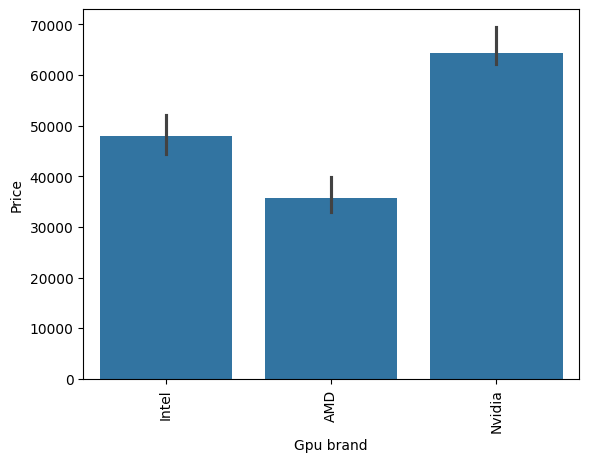

In [ ]:
# check the impact of gpu brand with price
sns.barplot(x=df['Gpu brand'],y=df['Price'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# drop the column
df.drop(columns=['Gpu'],inplace=True)

In [ ]:
# check how many operating systems are there in the dataset
df['OpSys'].value_counts()

OpSys
Windows 10      1047
No OS             63
Linux             61
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            1
Name: count, dtype: int64

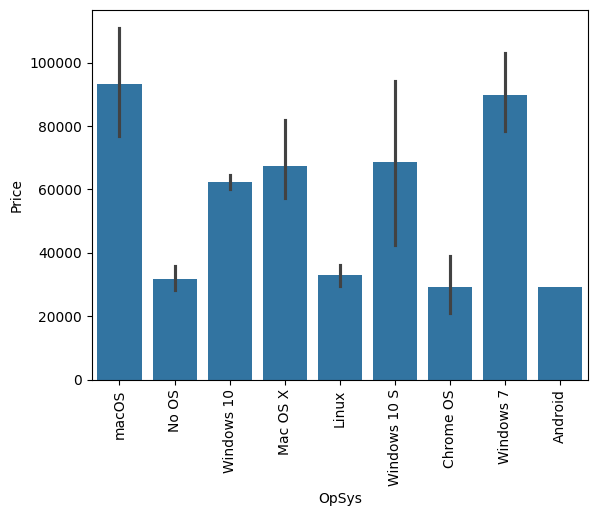

In [ ]:
# check the impact of price with the operating systems
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# create a function to seperate thye mac and windows
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [ ]:
# apply the above defined function to the new column os
df['os'] = df['OpSys'].apply(cat_os)

In [ ]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,2560,1600,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,1440,900,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,1920,1080,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,2880,1800,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,2560,1600,Intel Core i5,0,256,Intel,Mac


In [ ]:
# drop the columns
df.drop(columns=['OpSys'],inplace=True)

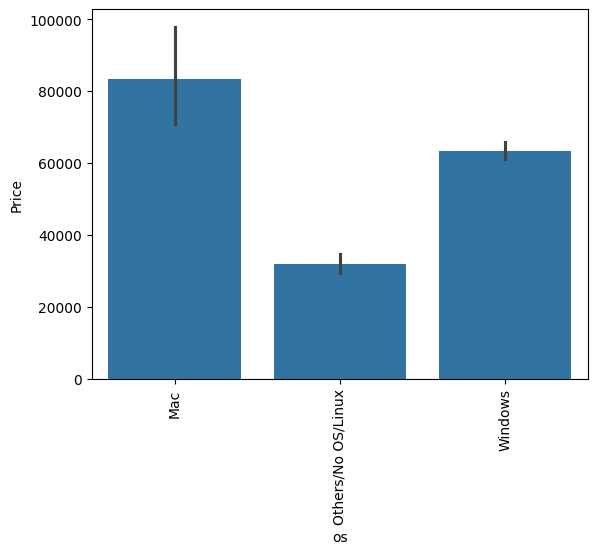

In [ ]:
# check the impact of os with the column
sns.barplot(x=df['os'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<ipython-input-70-05ee4c8848be>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

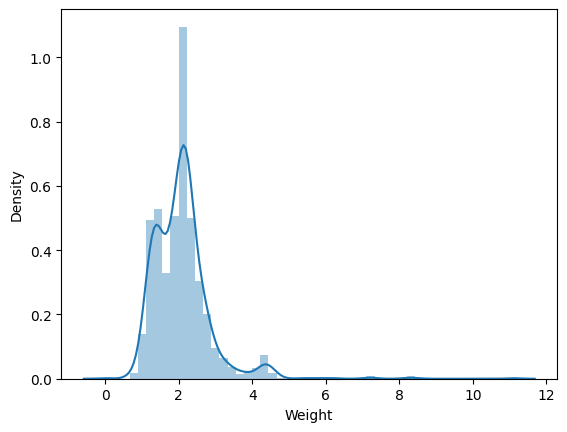

In [ ]:
sns.distplot(df['Weight'])

<Axes: xlabel='Weight', ylabel='Price'>

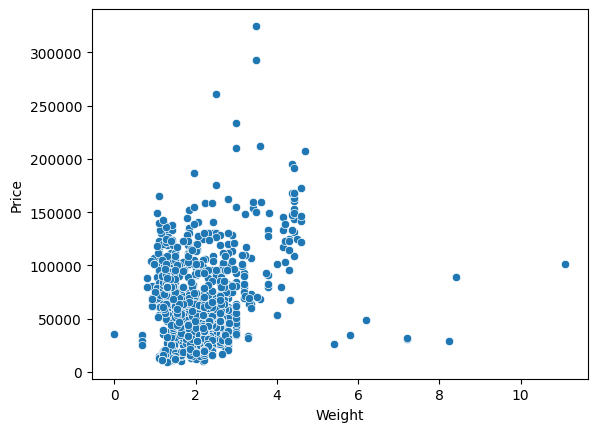

In [ ]:
sns.scatterplot(x=df['Weight'],y=df['Price'])

In [ ]:
# split the datset into the dependent and indipendent variables
X = df.drop(columns=['Price'])
y = df['Price']

In [ ]:
from sklearn.model_selection import train_test_split
# train the model
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train

,Company,TypeName,Ram,Weight,Touchscreen,Ips,X_res,Y_res,Cpu brand,HDD,SSD,Gpu brand,os
33,Dell,Ultrabook,16,1.20,1,0,3200,1800,Intel Core i7,0,512,Intel,Windows
162,Dell,Notebook,8,2.13,0,0,1920,1080,Intel Core i5,0,256,AMD,Windows
948,Dell,Notebook,4,2.36,0,0,1600,900,Intel Core i3,1000,0,AMD,Windows
591,Lenovo,Notebook,12,2.20,0,0,1920,1080,AMD Processor,0,512,AMD,Windows
767,Dell,Gaming,16,2.72,1,1,3840,2160,Intel Core i7,1000,128,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1072,HP,Ultrabook,8,1.26,0,0,1920,1080,Intel Core i5,0,256,Intel,Windows
1123,Dell,Notebook,4,2.09,0,0,1366,768,Intel Core i5,500,0,Intel,Others/No OS/Linux
1158,Lenovo,Notebook,8,2.50,0,0,1920,1080,Intel Core i5,0,0,AMD,Windows
882,Asus,Notebook,4,1.65,0,0,1366,768,Other Intel Processor,0,0,Intel,Windows


In [ ]:
# import the necessary libraries
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [ ]:
# calculate the count of distinct hdd
df['HDD'].value_counts()

HDD
0       708
1000    399
500     132
2000     31
32        1
128       1
Name: count, dtype: int64

In [ ]:
# calculate the count of the distinct ssd
df['SSD'].value_counts()

SSD
256     487
0       450
128     168
512     136
1000     15
32        6
180       4
16        3
64        1
240       1
8         1
Name: count, dtype: int64

In [ ]:
X_train.head()

,Company,TypeName,Ram,Weight,Touchscreen,Ips,X_res,Y_res,Cpu brand,HDD,SSD,Gpu brand,os
33,Dell,Ultrabook,16,1.20,1,0,3200,1800,Intel Core i7,0,512,Intel,Windows
162,Dell,Notebook,8,2.13,0,0,1920,1080,Intel Core i5,0,256,AMD,Windows
948,Dell,Notebook,4,2.36,0,0,1600,900,Intel Core i3,1000,0,AMD,Windows
591,Lenovo,Notebook,12,2.20,0,0,1920,1080,AMD Processor,0,512,AMD,Windows
767,Dell,Gaming,16,2.72,1,1,3840,2160,Intel Core i7,1000,128,Nvidia,Windows


In [ ]:
# check for the null values
X_train.isnull().sum()

Company        0
TypeName       0
Ram            0
Weight         1
Touchscreen    0
Ips            0
X_res          0
Y_res          0
Cpu brand      0
HDD            0
SSD            0
Gpu brand      0
os             0
dtype: int64

In [ ]:
# fill the missingh value of the weight with mean as it is numerical
X_train['Weight']=X_train['Weight'].fillna(X_train['Weight'].mean())

In [ ]:
X_train.isnull().sum()

Company        0
TypeName       0
Ram            0
Weight         0
Touchscreen    0
Ips            0
X_res          0
Y_res          0
Cpu brand      0
HDD            0
SSD            0
Gpu brand      0
os             0
dtype: int64

**LINEAR REGRESSION**

In [ ]:
# define a column transformer to apply one hot encoding to categorical columns
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,8,11,12])
],remainder='passthrough')
# define the model
step2 = LinearRegression()
# combine the step 1 and step 2 into a pipe line
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])
# fit the pipeline on training data
pipe.fit(X_train,y_train)
# predict the data
y_pred = pipe.predict(X_test)
# print evaluation matrics
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))

R2 score 0.7086789088711181
MAE 12862.262261176471
MSE 345503291.70912284


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


KNN

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,8,11,12])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.7246565028452654
MAE 11813.706145882352
MSE 326554058.44122493


In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,8,11,12])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))

R2 score 0.7090129148255587
MAE 11765.00144789415
MSE 345107164.6856296


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


RANDOM FOREST

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,8,11,12])
],remainder='passthrough')
step2 = RandomForestRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.8169381635603682
MAE 9735.475896230268
MSE 217109124.6127058


** gradient booster**

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,8,11,12])
],remainder='passthrough')
step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.8322778542692214
MAE 9469.521675773356
MSE 198916436.90454423


XGB REGRESSOR

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,8,11,12])
],remainder='passthrough')
step2 = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.8076407673780517
MAE 9945.195082971815
MSE 228135724.06991115


In [ ]:
import pickle

pickle.dump(df,open('df.pkl3','wb'))
pickle.dump(pipe,open('pipe3.pkl','wb'))

In [ ]:
df

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,X_res,Y_res,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,2560,1600,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,1440,900,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,1920,1080,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,2880,1800,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,2560,1600,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,33992.6400,1,1,1920,1080,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,79866.7200,1,1,3200,1800,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,12201.1200,0,0,1366,768,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,40705.9200,0,0,1366,768,Intel Core i7,1000,0,AMD,Windows


In [ ]:
X_train

,Company,TypeName,Ram,Weight,Touchscreen,Ips,X_res,Y_res,Cpu brand,HDD,SSD,Gpu brand,os
33,Dell,Ultrabook,16,1.20,1,0,3200,1800,Intel Core i7,0,512,Intel,Windows
162,Dell,Notebook,8,2.13,0,0,1920,1080,Intel Core i5,0,256,AMD,Windows
948,Dell,Notebook,4,2.36,0,0,1600,900,Intel Core i3,1000,0,AMD,Windows
591,Lenovo,Notebook,12,2.20,0,0,1920,1080,AMD Processor,0,512,AMD,Windows
767,Dell,Gaming,16,2.72,1,1,3840,2160,Intel Core i7,1000,128,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1072,HP,Ultrabook,8,1.26,0,0,1920,1080,Intel Core i5,0,256,Intel,Windows
1123,Dell,Notebook,4,2.09,0,0,1366,768,Intel Core i5,500,0,Intel,Others/No OS/Linux
1158,Lenovo,Notebook,8,2.50,0,0,1920,1080,Intel Core i5,0,0,AMD,Windows
882,Asus,Notebook,4,1.65,0,0,1366,768,Other Intel Processor,0,0,Intel,Windows


In [ ]:
pip install gradio


In [ ]:
X_train['Company'].value_counts()

Company
Dell         237
Lenovo       227
HP           216
Asus         121
Acer          73
MSI           46
Toshiba       41
Apple         17
Samsung        7
Razer          6
Mediacom       5
Microsoft      4
Xiaomi         4
LG             3
Vero           3
Chuwi          2
Fujitsu        2
Huawei         2
Google         1
Name: count, dtype: int64

In [ ]:
X_train['TypeName'].value_counts()

TypeName
Notebook              562
Gaming                165
Ultrabook             155
2 in 1 Convertible     92
Workstation            25
Netbook                18
Name: count, dtype: int64

In [ ]:
columns = ['Company', 'TypeName', 'Ram', 'Weight', 'Touchscreen', 'Ips',
           'X_res', 'Y_res', 'Cpu brand', 'HDD', 'SSD', 'Gpu brand', 'os']

for column in columns:
    print(f"Value counts for {column}:")
    print(X_train[column].value_counts())
    print("\n")

Value counts for Company:
Company
Dell         237
Lenovo       227
HP           216
Asus         121
Acer          73
MSI           46
Toshiba       41
Apple         17
Samsung        7
Razer          6
Mediacom       5
Microsoft      4
Xiaomi         4
LG             3
Vero           3
Chuwi          2
Fujitsu        2
Huawei         2
Google         1
Name: count, dtype: int64


Value counts for TypeName:
TypeName
Notebook              562
Gaming                165
Ultrabook             155
2 in 1 Convertible     92
Workstation            25
Netbook                18
Name: count, dtype: int64


Value counts for Ram:
Ram
8     494
4     281
16    155
6      28
12     20
2      17
32     16
64      3
24      2
1       1
Name: count, dtype: int64


Value counts for Weight:
Weight
2.200    99
2.100    44
2.300    34
2.000    33
2.400    29
         ..
2.750     1
2.191     1
2.690     1
2.160     1
2.150     1
Name: count, Length: 168, dtype: int64


Value counts for Touchscreen:
Touchs

In [ ]:
pip install gradio

In [ ]:
X_train=X_train.rename(columns={'Cpu brand': 'Cpu_brand' , 'Gpu brand':'Gpu_brand'})

In [ ]:
def predection (Company, TypeName, Ram, Weight, Touchscreen, Ips,Cpu_brand,HDD,SSD,Gpu_brand,os):
  input_data=pd.DataFrame({'Company':[Company],'TypeName':[TypeName],'Ram':[Ram],'Weight':[Weight],'Touchscreen':[Touchscreen],'Ips':[Ips],'Cpu_brand':[Cpu_brand],
                           'HDD':[HDD],'SSD':[SSD],'Gpu_brand':[Gpu_brand],'os':[os]})
  return pipe.predict (input_data)[0]

In [ ]:
X_train.dtypes

Company         object
TypeName        object
Ram              int32
Weight         float32
Touchscreen      int64
Ips              int64
X_res            int64
Y_res            int64
Cpu_brand       object
HDD              int64
SSD              int64
Gpu_brand       object
os              object
dtype: object

In [ ]:
import gradio as gr
gradio=gr.Interface(fn=predection,inputs=['text','text','number','number','number','number','text','number','number','text','text'],outputs='number',title='laptop price predection')

In [ ]:
gradio.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://a838450589584edcc0.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
